In [1]:
!pip install geopandas==0.8.2
!pip install --upgrade pyshp
!pip install shapely  ==1.7.0
!pip install --upgrade descartes
!pip install mapclassify==2.3.0 libpysal==4.3.0 splot==1.1.3
!pip install esda
!pip install pysal

     |████████████████████████████████| 962 kB 9.6 MB/s 
     |████████████████████████████████| 6.3 MB 58.2 MB/s 
     |████████████████████████████████| 15.4 MB 61.8 MB/s 
     |████████████████████████████████| 219 kB 11.7 MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37325 sha256=23fe39892cf8d474e273ae9f4d3d0faf1c83f7fd35481c355a3675249cbcff02
  Stored in directory: /root/.cache/pip/wheels/43/f8/87/53c8cd41545ba20e536ea29a8fcb5431b5f477ca50d5dffbbe
Successfully built pyshp
ERROR: Invalid requirement: '==1.7.0'
     |████████████████████████████████| 2.4 MB 20.6 MB/s 
     |████████████████████████████████| 95 kB 2.8 MB/s 
     |████████████████████████████████| 209 kB 66.0 MB/s 
     |████████████████████████████████| 60 kB 6.1 MB/s 
     |████████████████████████████████| 269 kB 71.1 MB/s 
  Created wheel for libpysal: filename=libpysal-4.3.0-py2.py3-none-any.whl size=2379095 sha256=04e4b68207b5fcab4809bf63d6aa6dc02ce6a8622adcae9fbf282f680fd9773e
  St

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.formula.api as sm

# para gráficos
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# para a análise de dados espaciais
import geopandas as gp
import pysal as ps
import splot
import mapclassify as mc
from libpysal.weights import Queen
from libpysal import weights
from esda import Moran, Moran_Local, G_Local
from splot.esda import plot_moran, moran_scatterplot, lisa_cluster, plot_local_autocorrelation

# links com arquivos úteis
link = 'https://raw.githubusercontent.com/lincolnfrias/dados/master/'
link_p = 'https://raw.githubusercontent.com/patriciasiqueira/patriciasiqueira.github.io/master/arquivos/'

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [3]:
# ler dados de interesse
dados = pd.read_csv(link_p+'qtde-22.csv', encoding='latin1')
# quantidade produzida em toneladas em 2017

# para ler um arquivo salvo no computador
# ir primeiro em > e Files
# dados = pd.read_csv('qtde_22.csv', encoding='latin1')

In [4]:
# nomes das variáveis
dados.columns

Index(['ibge7', 'mun', 'nome_meso', 'abacate', 'abacaxi', 'alho', 'amendoim',
       'arroz', 'aveia', 'banana', 'batata-doce', 'batata-inglesa',
       'cafe_total', 'cafe_arab', 'cana', 'feijao', 'girassol', 'laranja',
       'maracuja', 'milho', 'soja', 'sorgo', 'tomate', 'trigo', 'uva'],
      dtype='object')

In [5]:
# número de linhas e colunas do dataframe
dados.shape

(853, 25)

In [6]:
# mostrar algumas linhas do dataframe
dados.head(3)

,ibge7,mun,nome_meso,abacate,abacaxi,alho,amendoim,arroz,aveia,banana,batata-doce,batata-inglesa,cafe_total,cafe_arab,cana,feijao,girassol,laranja,maracuja,milho,soja,sorgo,tomate,trigo,uva
0,3100104,Abadia dos Dourados,Triângulo Mineiro/Alto Paranaíba,0,0,0,0,2,0,47,0,0,30,30,460,18,0,0,0,8028,11685,1212,100,0,0
1,3100203,Abaeté,Central Mineira,0,540,0,0,8,0,28,0,0,0,0,9000,0,0,0,63,4680,1404,0,0,0,0
2,3100302,Abre Campo,Zona da Mata,0,0,0,0,0,0,50,0,0,3140,3140,9000,170,0,0,0,780,0,0,0,0,0


In [7]:
# renomear colunas
# 'ibge7' será 'mun' (código do município)
# 'mun' será 'município' (nome do município)

dados.rename(columns={'mun': 'municipio'}, inplace=True)  # inplace = True modifica o dataframe
dados.rename(columns={'ibge7': 'mun'}, inplace=True)

In [8]:
# ler shapefile
link = 'https://raw.githubusercontent.com/lincolnfrias/dados/master/mg.json'
geodf = gp.read_file(link)

In [9]:
geodf.head()

,NM_MUNICIP,CD_GEOCMU,geometry
0,ABADIA DOS DOURADOS,3100104,"POLYGON ((-47.42967 -18.16543, -47.42307 -18.1..."
1,ABAETÉ,3100203,"POLYGON ((-45.13930 -19.21048, -45.15975 -19.1..."
2,ABRE CAMPO,3100302,"POLYGON ((-42.31071 -20.14279, -42.32217 -20.1..."
3,ACAIACA,3100401,"POLYGON ((-43.02387 -20.41022, -43.03283 -20.4..."
4,AÇUCENA,3100500,"POLYGON ((-42.36208 -18.92569, -42.36636 -18.9..."


In [10]:
# mesclar shapefile com dataframe
# usando a coluna mun
geodf.rename(columns={'CD_GEOCMU': 'mun'}, inplace=True)  # mudar nome da coluna com cód. para 'mun'
geodf['mun'] = geodf.mun.astype(int)  # transformar códigos em inteiros
mg = pd.merge(geodf, dados, on='mun', suffixes=('', '_y'))  # mesclar o dataframe e o shapefile
mg.shape

(853, 27)

In [11]:
# ver objeto resultante (dataframe + shapefile)
mg.head(3)

,NM_MUNICIP,mun,geometry,municipio,nome_meso,abacate,abacaxi,alho,amendoim,arroz,aveia,banana,batata-doce,batata-inglesa,cafe_total,cafe_arab,cana,feijao,girassol,laranja,maracuja,milho,soja,sorgo,tomate,trigo,uva
0,ABADIA DOS DOURADOS,3100104,"POLYGON ((-47.42967 -18.16543, -47.42307 -18.1...",Abadia dos Dourados,Triângulo Mineiro/Alto Paranaíba,0,0,0,0,2,0,47,0,0,30,30,460,18,0,0,0,8028,11685,1212,100,0,0
1,ABAETÉ,3100203,"POLYGON ((-45.13930 -19.21048, -45.15975 -19.1...",Abaeté,Central Mineira,0,540,0,0,8,0,28,0,0,0,0,9000,0,0,0,63,4680,1404,0,0,0,0
2,ABRE CAMPO,3100302,"POLYGON ((-42.31071 -20.14279, -42.32217 -20.1...",Abre Campo,Zona da Mata,0,0,0,0,0,0,50,0,0,3140,3140,9000,170,0,0,0,780,0,0,0,0,0


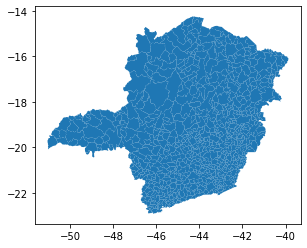

In [12]:
mg.plot();

In [13]:
mg.columns

Index(['NM_MUNICIP', 'mun', 'geometry', 'municipio', 'nome_meso', 'abacate',
       'abacaxi', 'alho', 'amendoim', 'arroz', 'aveia', 'banana',
       'batata-doce', 'batata-inglesa', 'cafe_total', 'cafe_arab', 'cana',
       'feijao', 'girassol', 'laranja', 'maracuja', 'milho', 'soja', 'sorgo',
       'tomate', 'trigo', 'uva'],
      dtype='object')